In [2]:
# Import necessary libraries
from copy import deepcopy
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

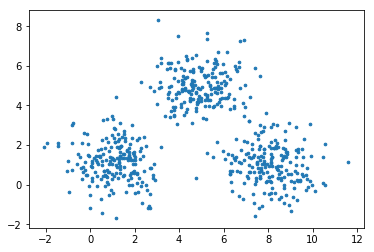

In [9]:
# Set three centers, the model should predict similar results
center_1 = np.array([1,1])
center_2 = np.array([5,5])
center_3 = np.array([8,1])

# Generate random data and center it to the three centers
sigma = 1
data_1 = sigma*np.random.randn(200,2) + center_1
data_2 = sigma*np.random.randn(200,2) + center_2
data_3 = sigma*np.random.randn(200,2) + center_3

data = np.concatenate((data_1, data_2, data_3), axis = 0)
np.random.shuffle(data)

plt.scatter(data[:,0], data[:,1], s=7)

In [3]:
# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [10]:
# Number of clusters
k = 3
# Number of training data
n = data.shape[0]
# Number of features in the data
c = data.shape[1]

# Generate random centers, here we use sigma and mean to ensure it represent the whole data
mean = np.mean(data, axis = 0)
std = np.std(data, axis = 0)
centers = np.random.randn(k,c)*std + mean
print(centers)

[[8.03265813 5.19808026]
 [2.86996004 2.48920709]
 [3.82670936 0.19010427]]


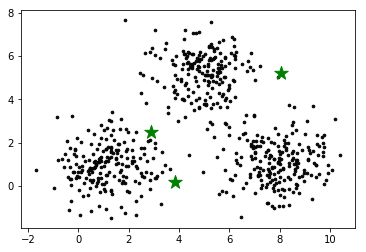

In [11]:
# Plotting along with the Centroids
plt.scatter(data[:,0], data[:,1], c='#050505', s=7)
plt.scatter(centers[:,0], centers[:,1], marker='*', s=200, c='g')

In [6]:
# To store the value of centroids when it updates
centers_old = np.zeros(centers.shape)
# Cluster Lables(0, 1, 2, ... , k-1)
clusters = np.zeros(len(data))
# Error func. - Distance between new centroids and old centroids
error = dist(centers, centers_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Step 1. Assign each value to its closest cluster
    # TODO
    # Step 2. Store the old centroid values
    # TODO
    # Step 3. Find the new centroids by taking the average value
    # TODO
    error = dist(centers, centers_old, None)

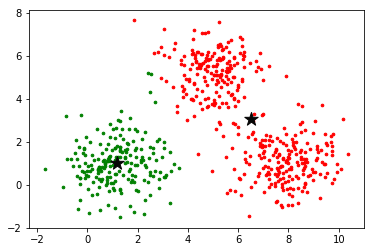

In [7]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([data[j] for j in range(len(data)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(centers[:, 0], centers[:, 1], marker='*', s=200, c='#050505')

In [8]:
# Calculate reconstruction data and reconstruction data
recon_data = np.zeros(data.shape)
recon_error = np.zeros(k)

# TODO

print(recon_error)

3773.2267879835704


Error for K = 0 : 90.0164612488985
Error for K = 1 : 85.88332624637695
Error for K = 2 : 60.5272519802154
Error for K = 3 : 63.70390954678102
Error for K = 4 : 66.6330975416657
Error for K = 5 : 65.85645553521987
Error for K = 6 : 68.08831083990799


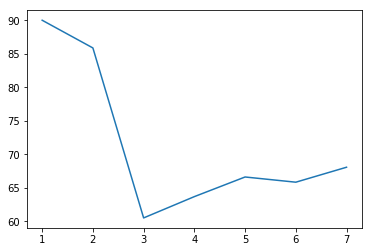

In [9]:
def kmeans(k, data):
    # Number of training data
    n = data.shape[0]
    # Number of features in the data
    c = data.shape[1]

    # Generate random centers, here we use sigma and mean to ensure it represent the whole data
    mean = np.mean(data, axis = 0)
    std = np.std(data, axis = 0)
    centers = np.random.randn(k,c)*std + mean
    # To store the value of centroids when it updates
    
    centers_old = np.zeros(centers.shape)
    # Cluster Lables(0, 1, 2, ... , k)
    clusters = np.zeros(len(data))
    # Error func. - Distance between new centroids and old centroids
    error = dist(centers, centers_old, None)
    # Loop will run till the error becomes zero
    while error != 0:
        # Step 1. Assign each value to its closest cluster
        # TODO
        # Step 2. Store the old centroid values
        # TODO
        # Step 3. Find the new centroids by taking the average value
        # TODO
        error = dist(centers, centers_old, None)
        
    # Calculate reconstruction data and reconstruction data
    # TODO
    return recon_error


error = np.zeros(5)
for i in range(5):
    error[i] = kmeans(i+1, data)
    print("Error for K = " + str(i+1) + " : " + str(error[i]))

plt.plot(np.arange(1, 6), error)

In [ ]:
# Image compression
import cv2
from mpl_toolkits.mplot3d import Axes3D

# read image
img = cv2.imread('test_image.jpg')

#convert from BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Run kmeans
data = img.reshape(-1, 3)
recon_data, _ = kmeans(3, data)

In [ ]:
print(recon_data.shape)
recon_img = recon_data.reshape(img.shape)
cv2.imwrite('recon_img.jpg', recon_img)